In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib

import scipy.fftpack as fftp
import os

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
folder_loc = 'Albert_Data/2019-01-28/'
file_loc = '2019-01-28-geophone-scan'
# folder_loc = 'Albert_Data/2019-02-25/'
# file_loc = 'noisy_cur_10khz-'
dat = np.loadtxt(folder_loc+file_loc+'001'+'.dat',skiprows=137)
dat_stmpy = stmpy.load(folder_loc+file_loc+'001'+'.dat')

for j in arange(2,365):
    file = folder_loc+file_loc+str(j).zfill(3)+'.dat'
    try:
#         temp_dat = stmpy.load(folder_loc+file)
        temp_dat = np.loadtxt(file, skiprows=137)
        dat = np.concatenate((dat,temp_dat))
        print(j,end='\r')
    except:
        pass
print(len(dat))

File import successful.
ERR: File not in standard format for processing. Could not correct for Bias offset
9069600


In [37]:
#Function finds the reshape value of the data to get closest to the desired frequency resolution
def res(freq_res, data_length, fs = 10000):
    # freq_res: desired frequency resolution
    # data_length: length of the data being transformed
    # fs: sampling rate that data was collected at (default=10000)
    #  Output:
    # Cuts: value that data can be reshaped as to reach desired resolution  
    cuts = int((data_length*freq_res)/fs)
    data_end = data_length%cuts
    return cuts,data_end

In [82]:
calibration_length = int(0.9*len(dat[:,0])) 
resolution = 0.09
cuts,end = res(resolution,calibration_length)
print(cuts)
cur_cal, cur = [dat[:calibration_length-end,0].reshape(cuts,-1),dat[calibration_length:,0]]
geo_cal, geo = [dat[:calibration_length-end,1].reshape(cuts,-1),dat[calibration_length:,1]]
bias_cal, bias = [dat[:calibration_length-end,2].reshape(cuts,-1),dat[calibration_length:,2]]
mod_cal, mod = [dat[:calibration_length-end,3].reshape(cuts,-1),dat[calibration_length:,3]]
x_cal, x = [dat[:calibration_length-end,4].reshape(cuts,-1),dat[calibration_length:,4]]
y_cal, y = [dat[:calibration_length-end,5].reshape(cuts,-1),dat[calibration_length:,5]]
tip_cal, tip = [dat[:calibration_length-end,6].reshape(cuts,-1),dat[calibration_length:,6]]
lix_cal, lix = [dat[:calibration_length-end,7].reshape(cuts,-1),dat[calibration_length:,7]]
liy_cal, liy = [dat[:calibration_length-end,8].reshape(cuts,-1),dat[calibration_length:,8]]
print(shape(cur_cal))

73
(73, 111816)


0.08943263933605207
(111816,)


(2.4465007079357807e-06, 0.5)

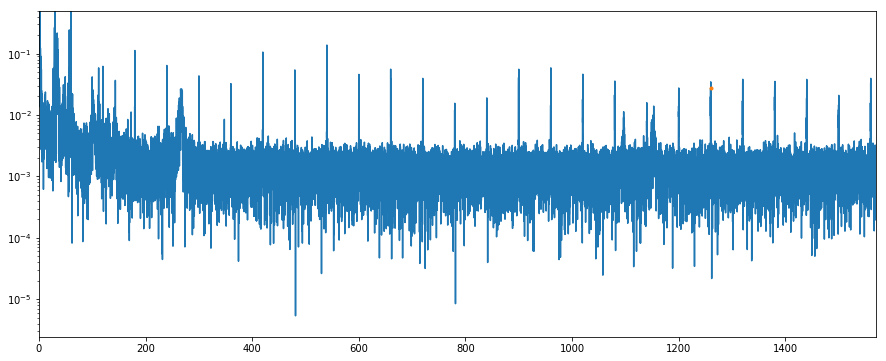

In [104]:
figsize(15,6)
# cur_fft = (fft.fft(cur_cal,axis=1))
geo_fft = mean(fft.fft(geo_cal),axis=0)
# bias_fft = mean(fft.fft(bias_cal),axis=0)
# mod_fft = (fft.fft(mod_cal,axis=1))
# x_fft = (fft.fft(x_cal,axis=1))
# y_fft = (fft.fft(y_cal,axis=1))
# tip_fft = (fft.fft(tip_cal,axis=1))
# lix_fft = (fft.fft(lix_cal,axis=1))
# liy_fft = (fft.fft(liy_cal,axis=1))

freqs = fft.fftfreq(len(geo_fft),1/10000)
print(freqs[1])
# plot(freqs,fft.fft(geo_cal[0,:]))
# plot(freqs,fft.fft(geo_cal[1,:]))

# plot(freqs,fft.fft(geo_cal[2,:]))
semilogy(freqs[:50000],abs(geo_fft[:50000]))


print(shape(geo_fft))
semilogy(freqs[int(1260/0.08943263933605207)],abs(geo_fft[int(1260/0.08943263933605207)]),'.')
xlim(0,1570)
ylim(0,0.5)

(2.4465007079357807e-06, 0.5)

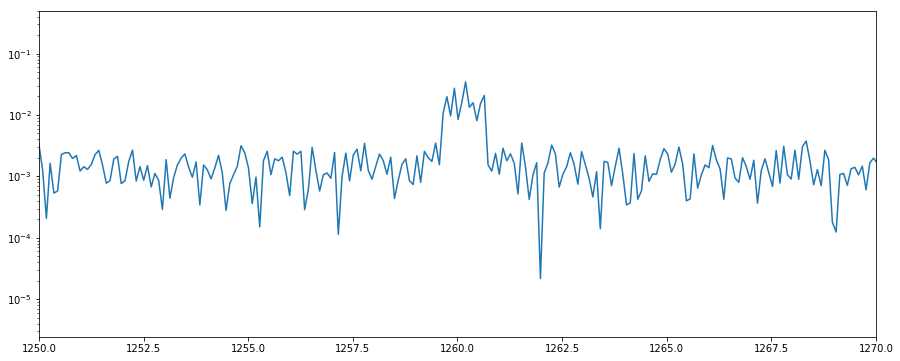

In [102]:
semilogy(freqs[:50000],abs(geo_fft[:50000]))
xlim(1250,1270)
ylim(0,0.5)

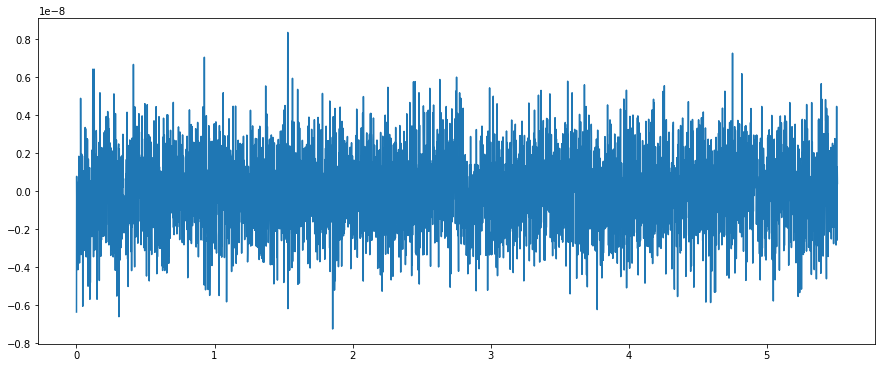

In [100]:
figsize(15,6)
freqs =fft.fftfreq(len(dat[:,-1]),1/10000)[:5000]
data = fft.fft(dat[:,-1])[:5000]
plot(freqs,data)


(1195, 1202)

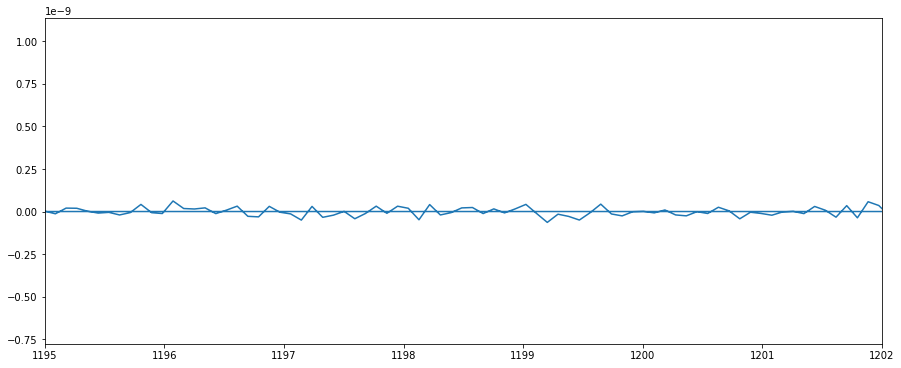

In [94]:
plot(freqs[0:100000],geo_fft[0:100000])
xlim(1195,1202)

In [ ]:
cur_fft = np.zeros((len(cur_cal_cut),cuts))
for i in arange(0,cuts):
    cur_fft[:,i] = fft.fft(cur_cal_cut[:,i]-mean(cur_cal_cut[:,i]))

cur_fft = mean(cur_fft,axis=1)

freqs = fft.fftfreq(len(cur_fft),1/10000)
spacing = freqs[1]
print(spacing)

In [ ]:
plot(freqs[0:1000],abs(cur_fft[:1000]))
xlim(0,10)

In [ ]:
ones = np.ones((4,5))
ones[:,0] = 2*ones[:,0]
ones[0,:] = 4*ones[0,:]
print(mean(ones,axis=1),mean(ones,axis=0))
print(ones)

In [ ]:
two = np.ones((20,1))
two[0] = 0
two[1] = 1
two[2] = 2
two[3] = 3
two[4] = 4
two[5] = 5
two[6] = 6
two[7] = 7
two[8] = 8
two[9] = 9     
# print(two)
two = two.reshape(10,-1)
print(two)
# print(mean(two,axis=1),mean(two,axis=0))

#axis = 1 is a sum along the rows
#axis = 0 is a sum along the columns

In [ ]:
scheduling presentation
